<a href="https://colab.research.google.com/github/sonalikaus/Cardiovascular-risk-prediction---Classification-Project/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:
# mounting drive to load dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CLASSIFICATION CAPSTONE/Copy of data_cardiovascular_risk.csv')

In [ ]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

##As id and education has not direct relation with Heart disease, we can drop these 2 columns

In [ ]:
##Dropping id and education
df.drop(['id','education'],axis=1,inplace=True)

##Renaming Target Variable

In [ ]:
df = df.rename(columns={'TenYearCHD':'Heart Disease'})

In [ ]:
df.describe()

,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart Disease
count,3390.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,49.542183,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,8.592878,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,56.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,70.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [ ]:
##Checking missing Values
df.isna().sum()

age                  0
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
Heart Disease        0
dtype: int64

In [ ]:
##Missing value percentage
missn_percen = round(df.isna().sum().sort_values(ascending=False)/len(df)*100,2)
print(missn_percen)

glucose            8.97
BPMeds             1.30
totChol            1.12
cigsPerDay         0.65
BMI                0.41
heartRate          0.03
age                0.00
sex                0.00
is_smoking         0.00
prevalentStroke    0.00
prevalentHyp       0.00
diabetes           0.00
sysBP              0.00
diaBP              0.00
Heart Disease      0.00
dtype: float64


##Dealing with missing values of glucose column

  Glucose has 304 missing values. These null values can be attributed to people who doesn't have diabetes. if this assumption turns out true, we can impute these nulls with the minimum value of glucose level.


In [ ]:
##Finding null values with no diabetes
df[df['glucose'].isnull()][['diabetes','glucose']]

,diabetes,glucose
9,0,NaN
10,0,NaN
36,0,NaN
38,0,NaN
55,0,NaN
...,...,...
3289,0,NaN
3290,0,NaN
3349,0,NaN
3370,0,NaN


In [ ]:
##Imputing the nulls with min value of glucose
df['glucose']= df['glucose'].fillna('40')

In [ ]:
##Checking missing value after imputation
df['glucose'].isnull().sum()

0

##Handling missing values in BPMeds

In [ ]:
##Relating null values of BPMeds with Diabetes
df[df['BPMeds'].isnull()][['diabetes','BPMeds']]

,diabetes,BPMeds
8,0,NaN
102,0,NaN
128,0,NaN
174,0,NaN
194,0,NaN
265,0,NaN
304,0,NaN
656,0,NaN
863,0,NaN
864,0,NaN


Most of the nulls are patients without Diabetes; however, there is one exception that must be addressed before we can impute the nulls with zero.

BPMeds at index 1367 is null, but has diabetes value as 1. 

This exception will be imputed with the value of 1 .The remaning null values will be imputed with 'None' as they corresond to patients with no diabetes.

In [ ]:
# Impute the only null BsmtFinType2 with a basement at index 332 with most frequent value
df.iloc[1367,df.columns.get_loc('BPMeds')]= 1

In [ ]:
# Impute the remaining nulls as None
df['BPMeds']= df['BPMeds'].fillna('0')

In [ ]:
df['BPMeds'].isnull().sum()

0

##Handling null values of totchol

In [ ]:
df[df['totChol'].isnull()][['diabetes','totChol']]

,diabetes,totChol
10,0,NaN
69,0,NaN
254,0,NaN
290,0,NaN
554,0,NaN
625,0,NaN
700,0,NaN
732,0,NaN
797,0,NaN
808,0,NaN


In [ ]:
##Replacing Missing value of totchol with min value
df['totChol']= df['totChol'].fillna(df['totChol'].min())

##Handling Missing Values in cigsPerDay  

In [ ]:
df['cigsPerDay']=df['cigsPerDay'].fillna(df['cigsPerDay'].mode()[0])

##Handling Missing Values in BMI

In [ ]:
df['BMI']=df['BMI'].fillna(df['BMI'].mode()[0])

##Handling Missing Values in heartRate  

In [ ]:
df['heartRate']=df['heartRate'].fillna(df['heartRate'].mode()[0])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   sex              3390 non-null   object 
 2   is_smoking       3390 non-null   object 
 3   cigsPerDay       3390 non-null   float64
 4   BPMeds           3390 non-null   object 
 5   prevalentStroke  3390 non-null   int64  
 6   prevalentHyp     3390 non-null   int64  
 7   diabetes         3390 non-null   int64  
 8   totChol          3390 non-null   float64
 9   sysBP            3390 non-null   float64
 10  diaBP            3390 non-null   float64
 11  BMI              3390 non-null   float64
 12  heartRate        3390 non-null   float64
 13  glucose          3390 non-null   object 
 14  Heart Disease    3390 non-null   int64  
dtypes: float64(6), int64(5), object(4)
memory usage: 397.4+ KB


##Dealing with Outliers

In [ ]:
# find Numerical variables
numerical = [var for var in df.columns if df[var].dtype!='O'and var not in ['Heart Disease','diabetes','prevalentStroke','prevalentHyp']]
print('There are {} numerical variables'.format(len(numerical)))

There are 7 numerical variables


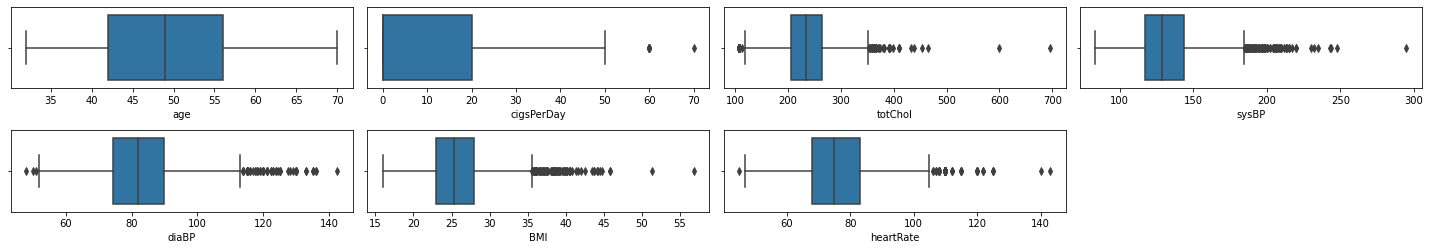

In [ ]:
# looking for outliers of every fearture of dataset with the help of boxplot
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
plt.figure(figsize = (20, 10))
num_it = 1 

for col in numerical:
    plt.subplot(6,4,num_it)
    sns.boxplot(df[col])
    num_it+=1
    
plt.tight_layout()

In [ ]:
##Dealing with the outliers by Capping the outlier rows with Percentiles
for col in df.describe().columns:
  upper_lim = df[col].quantile(.95)
  lower_lim = df[col].quantile(.05)
  df.loc[(df[col] > upper_lim),col] = upper_lim
  df.loc[(df[col] < lower_lim),col] = lower_lim

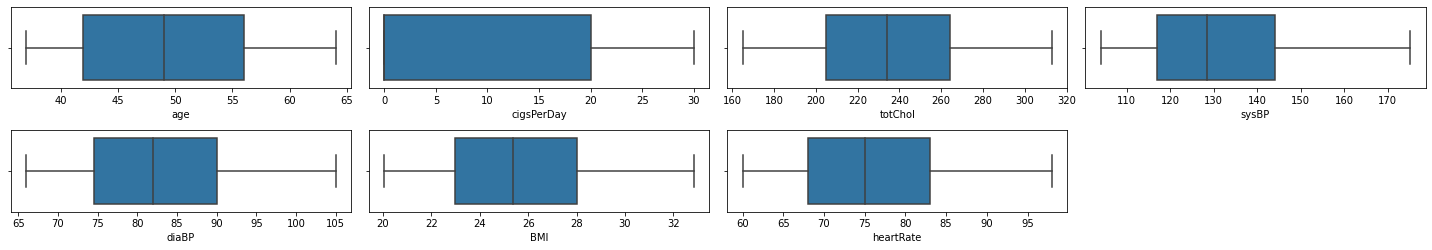

In [ ]:
##finding result 
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
plt.figure(figsize = (20, 10))
num_it = 1 

for col in numerical:
    plt.subplot(6,4,num_it)
    sns.boxplot(df[col])
    num_it+=1
    
plt.tight_layout()

Now, there is no outliers present in our dataset.

##Exploratory Data Analysis

## 1.Number of people having heart disease and not having heart disease

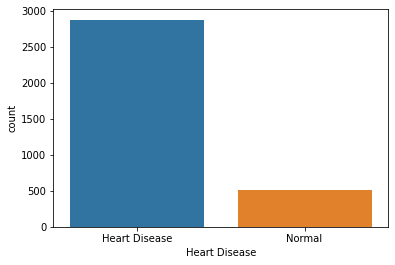

In [ ]:
# visualize the target variable
g = sns.countplot(df['Heart Disease'])
g.set_xticklabels(['Heart Disease','Normal'])
plt.show()

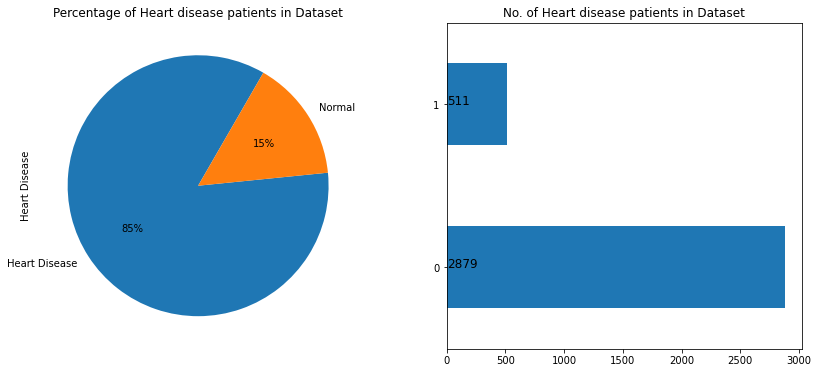

In [ ]:
# Plot
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(14,6))

ax1 = df['Heart Disease'].value_counts().plot.pie( x="Heart disease" ,y ='no.of patients', 
autopct = "%1.0f%%",labels=["Heart Disease","Normal"], startangle = 60,ax=ax1);
ax1.set(title = 'Percentage of Heart disease patients in Dataset')

ax2 = df['Heart Disease'].value_counts().plot(kind="barh" ,ax =ax2)
for i,j in enumerate(df['Heart Disease'].value_counts().values): ax2.text(.5,i,j,fontsize=12)
ax2.set(title = 'No. of Heart disease patients in Dataset')
plt.show()

##Genderwise distribution

Text(0.5, 1.0, 'Distribution of Gender')

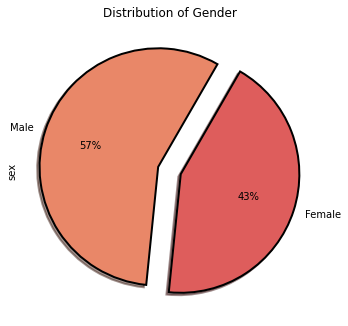

In [ ]:
plt.figure(figsize=(18,12))
plt.subplot(221)
df['sex'].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("flare",5),startangle = 60,labels=["Male","Female"],
wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,.1],shadow =True)
plt.title("Distribution of Gender")


In [ ]:
df.columns

Index(['age', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose', 'Heart Disease'],
      dtype='object')

##Analysis based on Diabetes

In [ ]:
# creating separate df for normal and heart patients

patient =df[df['Heart Disease']==1]

normal =df[df['Heart Disease']==0]

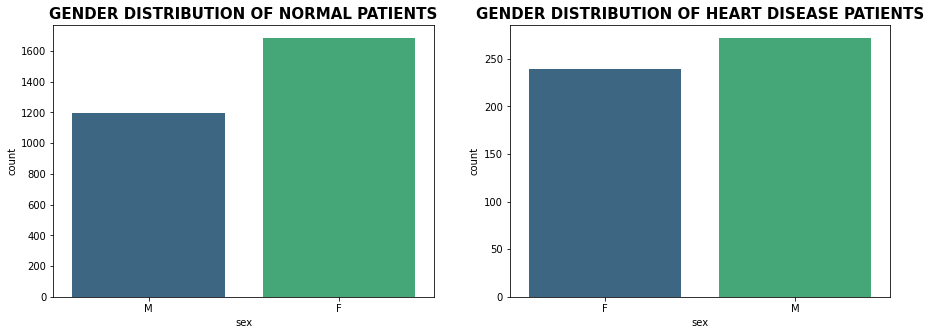

In [ ]:
# plotting normal patients
fig,ax=plt.subplots(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(Normal['sex'], palette='viridis')
plt.title('GENDER DISTRIBUTION OF NORMAL PATIENTS', fontsize=15, weight='bold' )


#plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(patient['sex'], palette='viridis')
plt.title('GENDER DISTRIBUTION OF HEART DISEASE PATIENTS', fontsize=15, weight='bold' )
plt.show()

##Age distribution

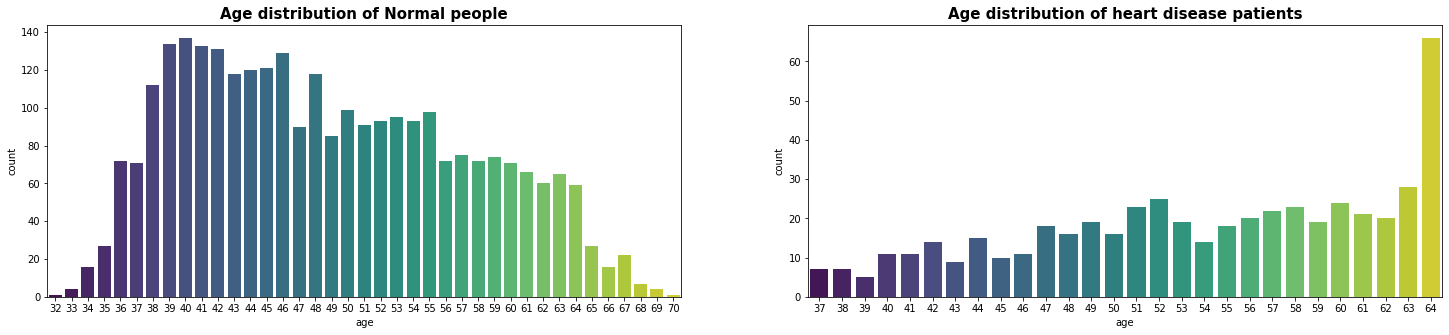

In [ ]:
# plotting normal patients
fig,ax=plt.subplots(figsize=(25,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(Normal['age'], palette='viridis')
plt.title('Age distribution of Normal people', fontsize=15, weight='bold' )


#plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(patient['age'], palette='viridis')
plt.title('Age distribution of heart disease patients', fontsize=15, weight='bold' )
plt.show()

In [ ]:
df.columns

Index(['age', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose', 'Heart Disease'],
      dtype='object')

##BMI distribution

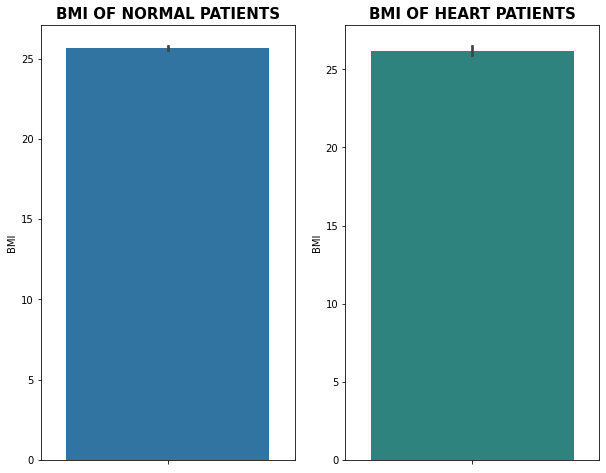

In [ ]:
# plotting normal patients
fig = plt.figure(figsize=(10,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.barplot(y='BMI',data = Normal)
plt.title('BMI OF NORMAL PATIENTS', fontsize=15, weight='bold')

#plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.barplot(y='BMI',data = patient, palette='viridis')
plt.title('BMI OF HEART PATIENTS', fontsize=15, weight='bold' )
plt.show()

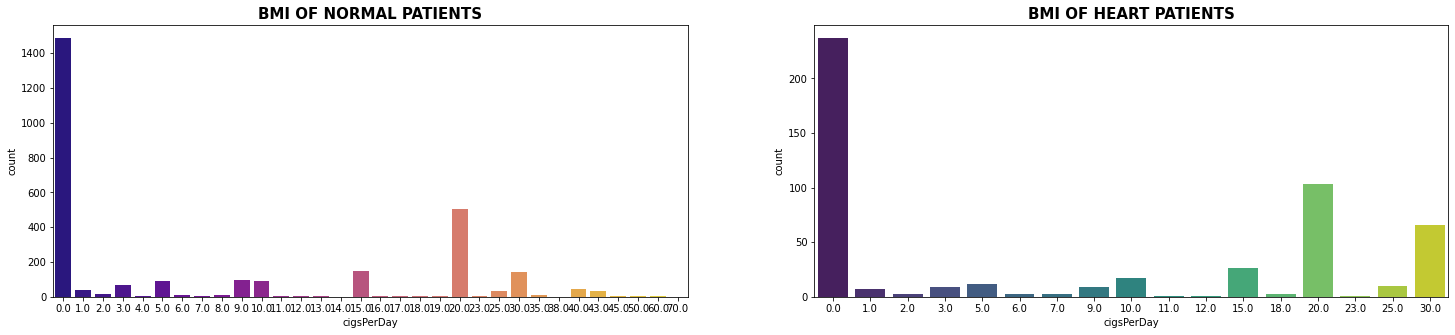

In [ ]:
# plotting normal patients
fig = plt.figure(figsize=(25,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(x='cigsPerDay',data = Normal, palette='plasma')
plt.title('BMI OF NORMAL PATIENTS', fontsize=15, weight='bold')

#plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(x='cigsPerDay',data = patient, palette='viridis')
plt.title('BMI OF HEART PATIENTS', fontsize=15, weight='bold' )
plt.show()